In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [20]:
# Load dataset
df = pd.read_csv("Housing.csv")

In [21]:
# Check for missing values
print(df.isnull().sum())

price               0
area                0
bedrooms            2
bathrooms           2
stories             2
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             1
prefarea            0
furnishingstatus    0
dtype: int64


In [22]:
# Encode categorical variables
le = LabelEncoder()
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
    df[col] = le.fit_transform(df[col])

In [23]:

# Drop rows with missing values (if any)
df.dropna(inplace=True)

In [24]:
# Feature-target split
X = df.drop('price', axis=1)
y = df['price']

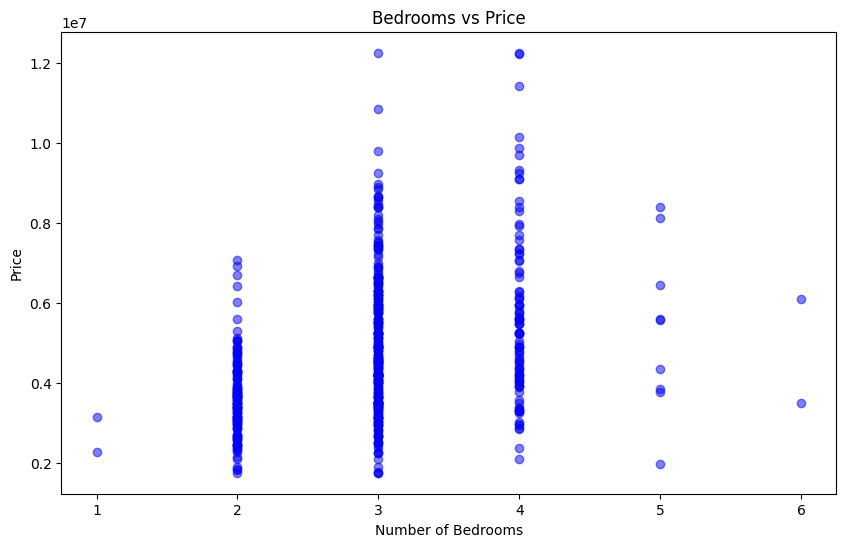

In [25]:
# Scatter plot: Number of bedrooms vs Price
plt.figure(figsize=(10, 6))
plt.scatter(df["bedrooms"], df["price"], color='blue', alpha=0.5)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms vs Price")
plt.show()


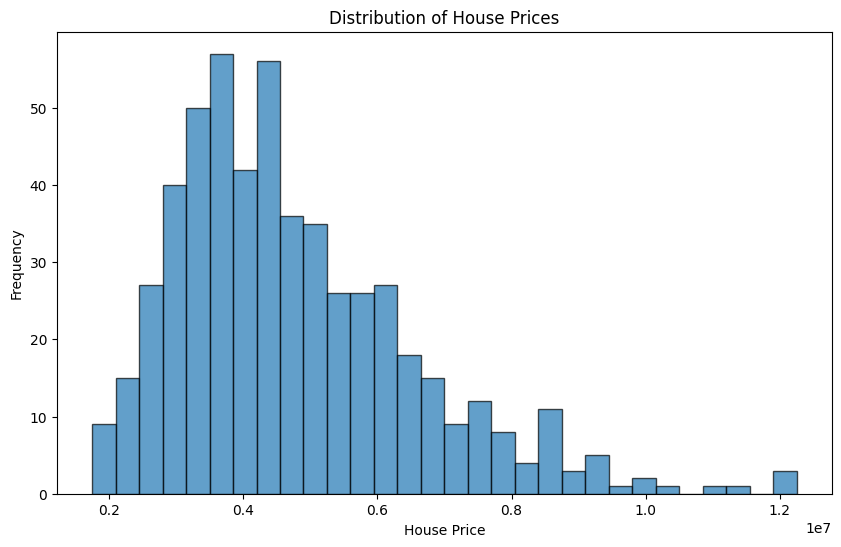

In [26]:
# Histogram: Distribution of house prices
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("House Price")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")
plt.show()

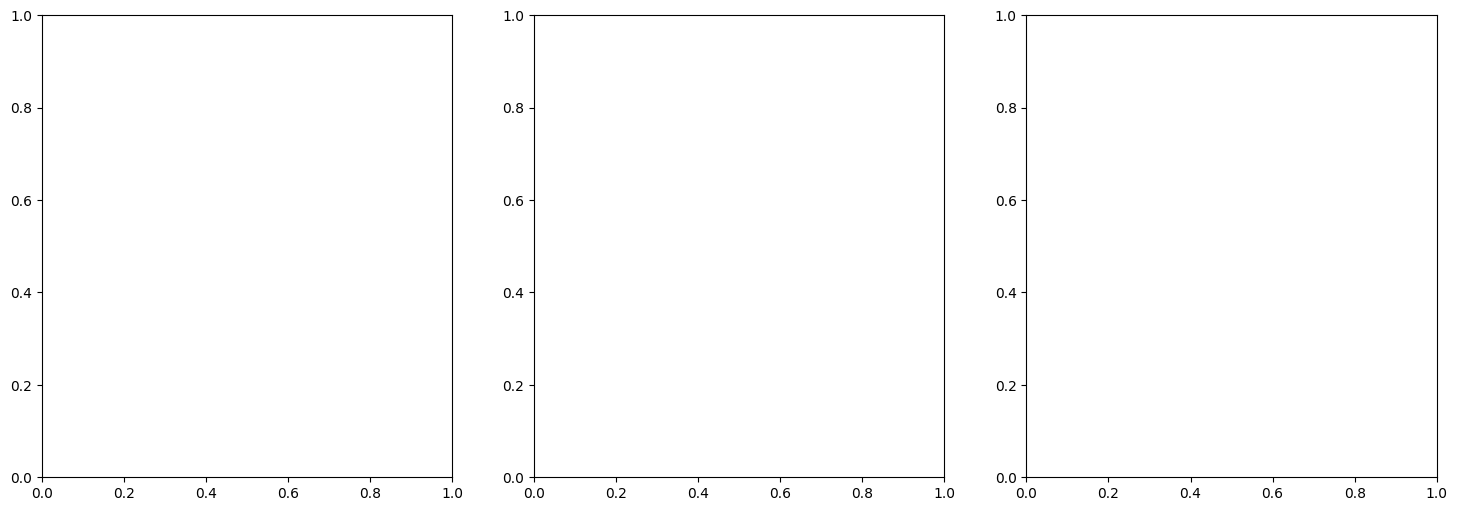

In [27]:
# Scatter plots for other features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

In [28]:
axes[0].scatter(df['area'], df['price'], color="blue")
axes[0].set_xlabel("Area")
axes[0].set_ylabel("Price")
axes[0].set_title("Area vs Price")

Text(0.5, 1.0, 'Area vs Price')

In [29]:
axes[1].scatter(df['stories'], df['price'], color="blue")
axes[1].set_xlabel("Stories")
axes[1].set_ylabel("Price")
axes[1].set_title("Stories vs Price")

Text(0.5, 1.0, 'Stories vs Price')

In [30]:
axes[2].scatter(df['bathrooms'], df['price'], color="blue")
axes[2].set_xlabel("Bathrooms")
axes[2].set_ylabel("Price")
axes[2].set_title("Bathrooms vs Price")

Text(0.5, 1.0, 'Bathrooms vs Price')

In [31]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(432, 12) (108, 12) (432,) (108,)


In [33]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))


R2 Score: 0.6697374997432733
Mean Absolute Error (MAE): 852623.8558467261
Mean Squared Error (MSE): 1424409449201.7908


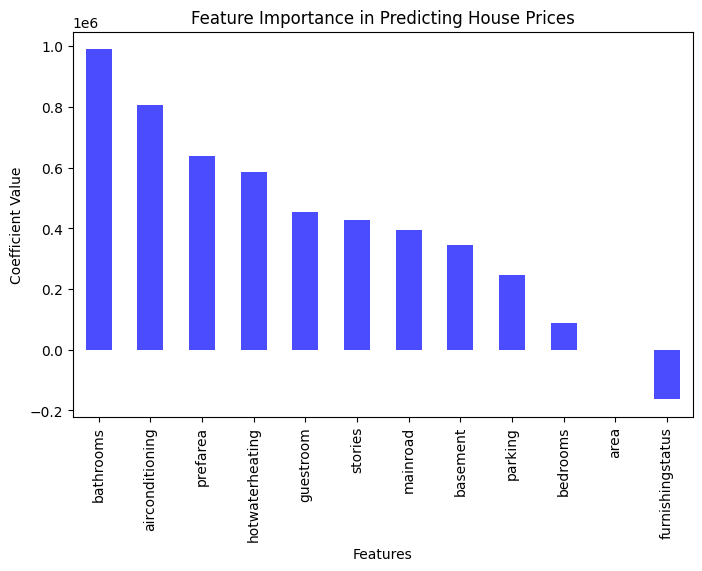

In [35]:

# Feature importance
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
coefficients.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance in Predicting House Prices")
plt.show()


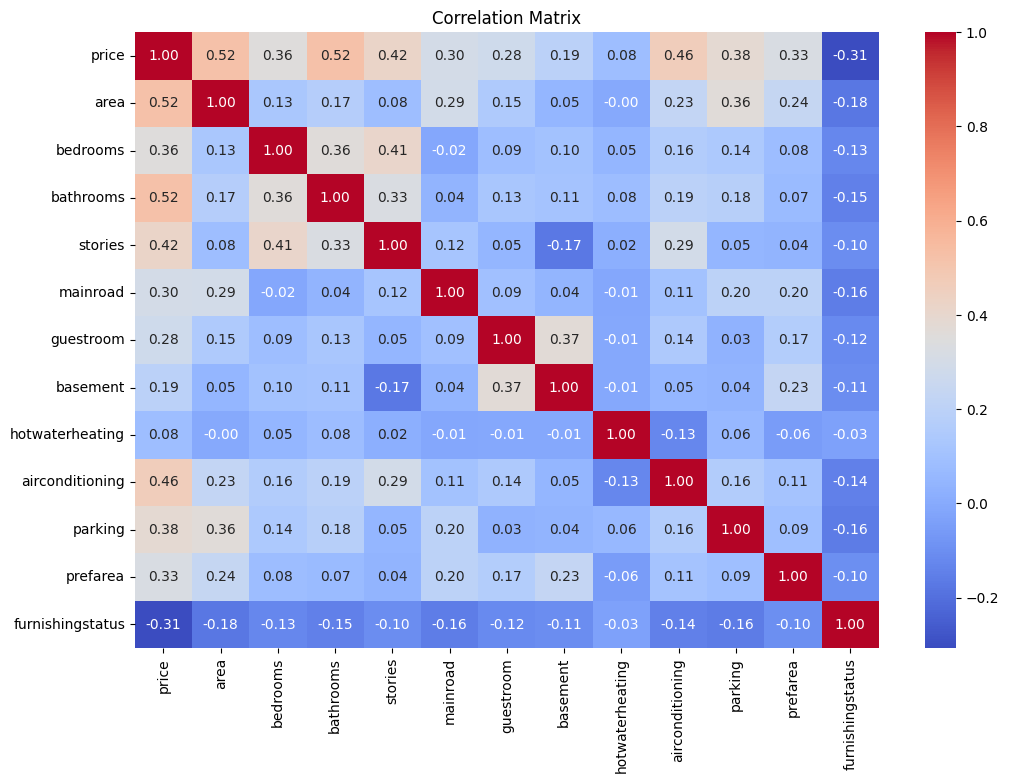

In [36]:
# Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()